In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Kfold Cross validation** is a statistical method to estimate the learning capabilities of the different machine learning models.

   Kfold algorithm splits the entire dataset into random number of train and test sets (number of splits are specified as "K" in Kwargs. We will in the below notebook identify the best "K" for the dataset and validate the number of models and select the best performing model for the given K value.

Check bellow illustration to understand how Kfold validation work:

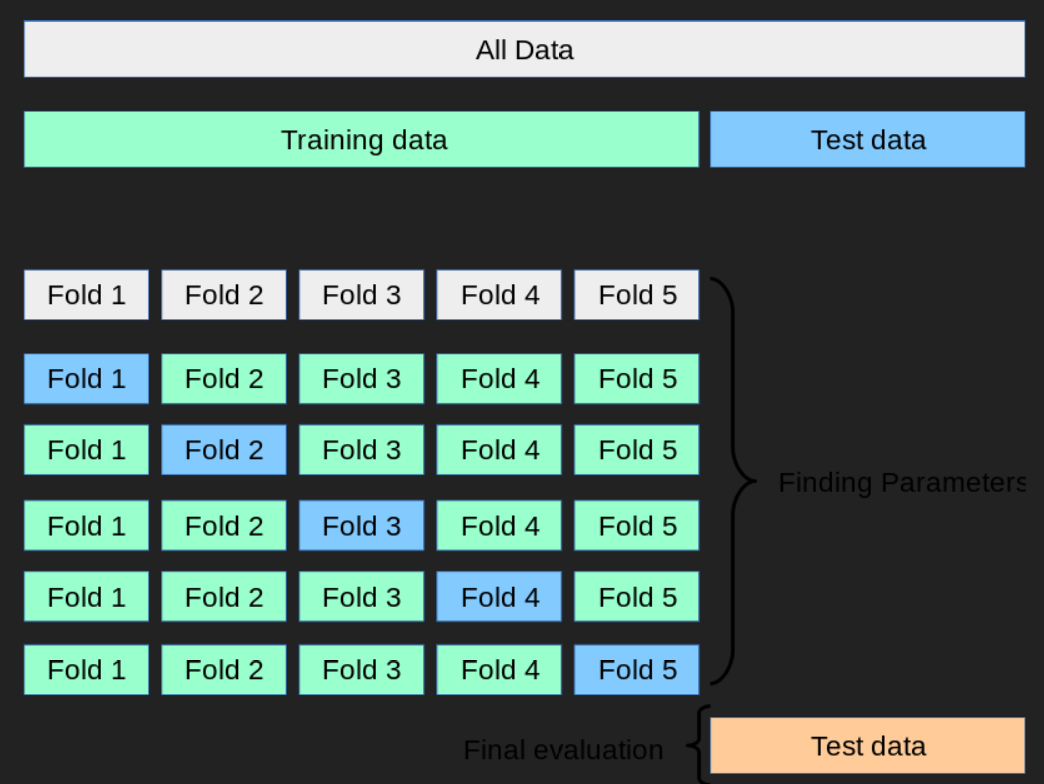


# Load Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load Dataset
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience. (If I am mistaken and the public license type disallowed me from doing so, I will take this down if requested.)
Content

For more information, read [Cortez et al., 2009].

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

# Explore Dataset

In [ ]:
#Explore dataset
df.info()

In [ ]:
corr = df.corr()
corr

In [ ]:
df.quality.unique()

In [ ]:
sns.countplot(x='quality', data = df)

In [ ]:
columns = df.columns
columns

# Data Visualization

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot('quality', 'fixed acidity', data = df)
sns.barplot('quality', 'fixed acidity', data = df)

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot('quality', 'volatile acidity', data = df)
sns.barplot('quality', 'volatile acidity', data = df)

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot('quality', 'citric acid', data = df)
sns.barplot('quality', 'citric acid', data = df)

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot('quality', 'residual sugar', data = df)
sns.barplot('quality', 'residual sugar', data = df)

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot('quality', 'chlorides', data = df)
sns.barplot('quality', 'chlorides', data = df)

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot('quality', 'free sulfur dioxide', data = df)
sns.barplot('quality', 'free sulfur dioxide', data = df)

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot('quality', 'total sulfur dioxide', data = df)
sns.barplot('quality', 'total sulfur dioxide', data = df)


In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot('quality', 'density', data = df)

In [ ]:
plt.figure(figsize = (10, 8))
sns.barplot(x = 'quality', y = 'density', data = df)

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot('quality', 'pH', data = df)
sns.barplot('quality', 'pH', data = df)

In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot('quality', 'sulphates', data = df)
sns.barplot('quality', 'sulphates', data = df)


In [ ]:
plt.figure(figsize = (10, 8))
sns.boxplot('quality', 'alcohol', data = df)
sns.barplot('quality', 'alcohol', data = df)

# Create Target Variable & Split Data set

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from numpy import mean

In [ ]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df.head()

In [ ]:
df['quality'].value_counts()

In [ ]:
X = df.drop('quality', axis = 1)
lb_en  = LabelEncoder()
y = lb_en.fit_transform(df['quality'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 50)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Model Selection

In [ ]:
# retreive the dataset
def get_dataset(n_samples=100):
    X, y = X_train, y_train
    return X, y

model = RandomForestClassifier()
 
# evaluate the model using a given test condition
def evaluate_model(cv, model):
    # get the dataset
    X, y = get_dataset()
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return np.mean(scores), scores.min(), scores.max()
 
# calculate the ideal test condition
ideal, _, _ = evaluate_model(LeaveOneOut(), model)
print('Ideal: %.3f' % ideal)
# define folds to test
folds = range(2,31)
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv, model)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
# plot the ideal case in a separate color
plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
# show the plot
plt.show()

In [ ]:
#Retreive Models for Kfold validation:

def get_models():
    models = []
    models.append(('LR',LogisticRegression()))
    models.append(('RC',RidgeClassifier()))
    models.append(('SVC',SVC()))
    models.append(('NB', GaussianNB()))
    models.append(('RC',RandomForestClassifier()))
    models.append(('ET',ExtraTreesClassifier()))
    return models

In [ ]:
# define test conditions
cv = KFold(n_splits=11, shuffle=True, random_state=1)

# get the list of models to consider
models = get_models()

# collect results
names = []
cv_results = []

In [ ]:
for name, model in models:
    results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    cv_results.append(results)
    names.append(name)
    print('%s: %f (%f)' % (name, results.mean(), results.std()))
# Compare Algorithms
plt.boxplot(cv_results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

# Train and Predict

In [ ]:
# train the model and predict 
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
predictions = et.predict(X_test)

In [ ]:
# Evaluate predictions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))